___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Гиперпараметры DBSCAN 


Давайте посмотрим, какие есть гиперпараметры в DBSCAN, и как они влияют на результаты работы модели!

## DBSCAN и примеры кластеризации

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

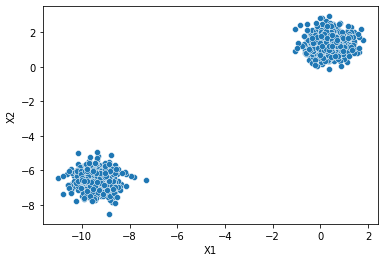

In [4]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

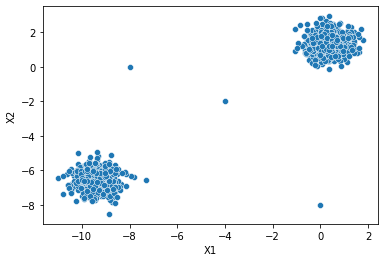

In [22]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## "Создаём" целевую переменную с помощью кластеризации (Label Discovery)

In [6]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [9]:
dbscan = DBSCAN()

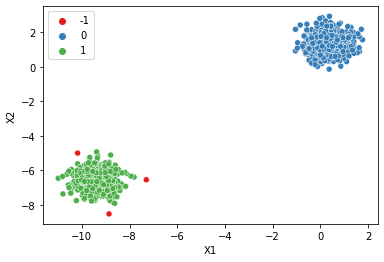

In [17]:
display_categories(dbscan,two_blobs)

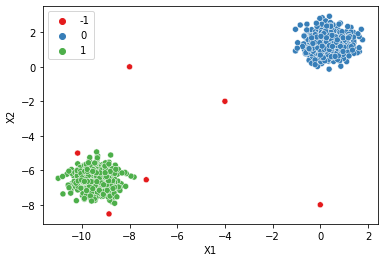

In [19]:

display_categories(dbscan,two_blobs_outliers)

# Эпсилон - Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

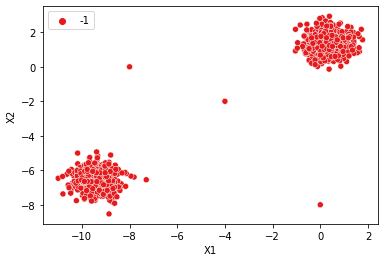

In [81]:
# Маленький эпсилон --> Маленькая окрестность вокруг точек --> Все точки являются выбросами (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

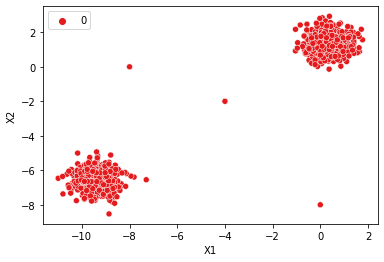

In [82]:
# Огромный эпсилон --> Большие окрестности точек --> Все точки в одном кластере (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

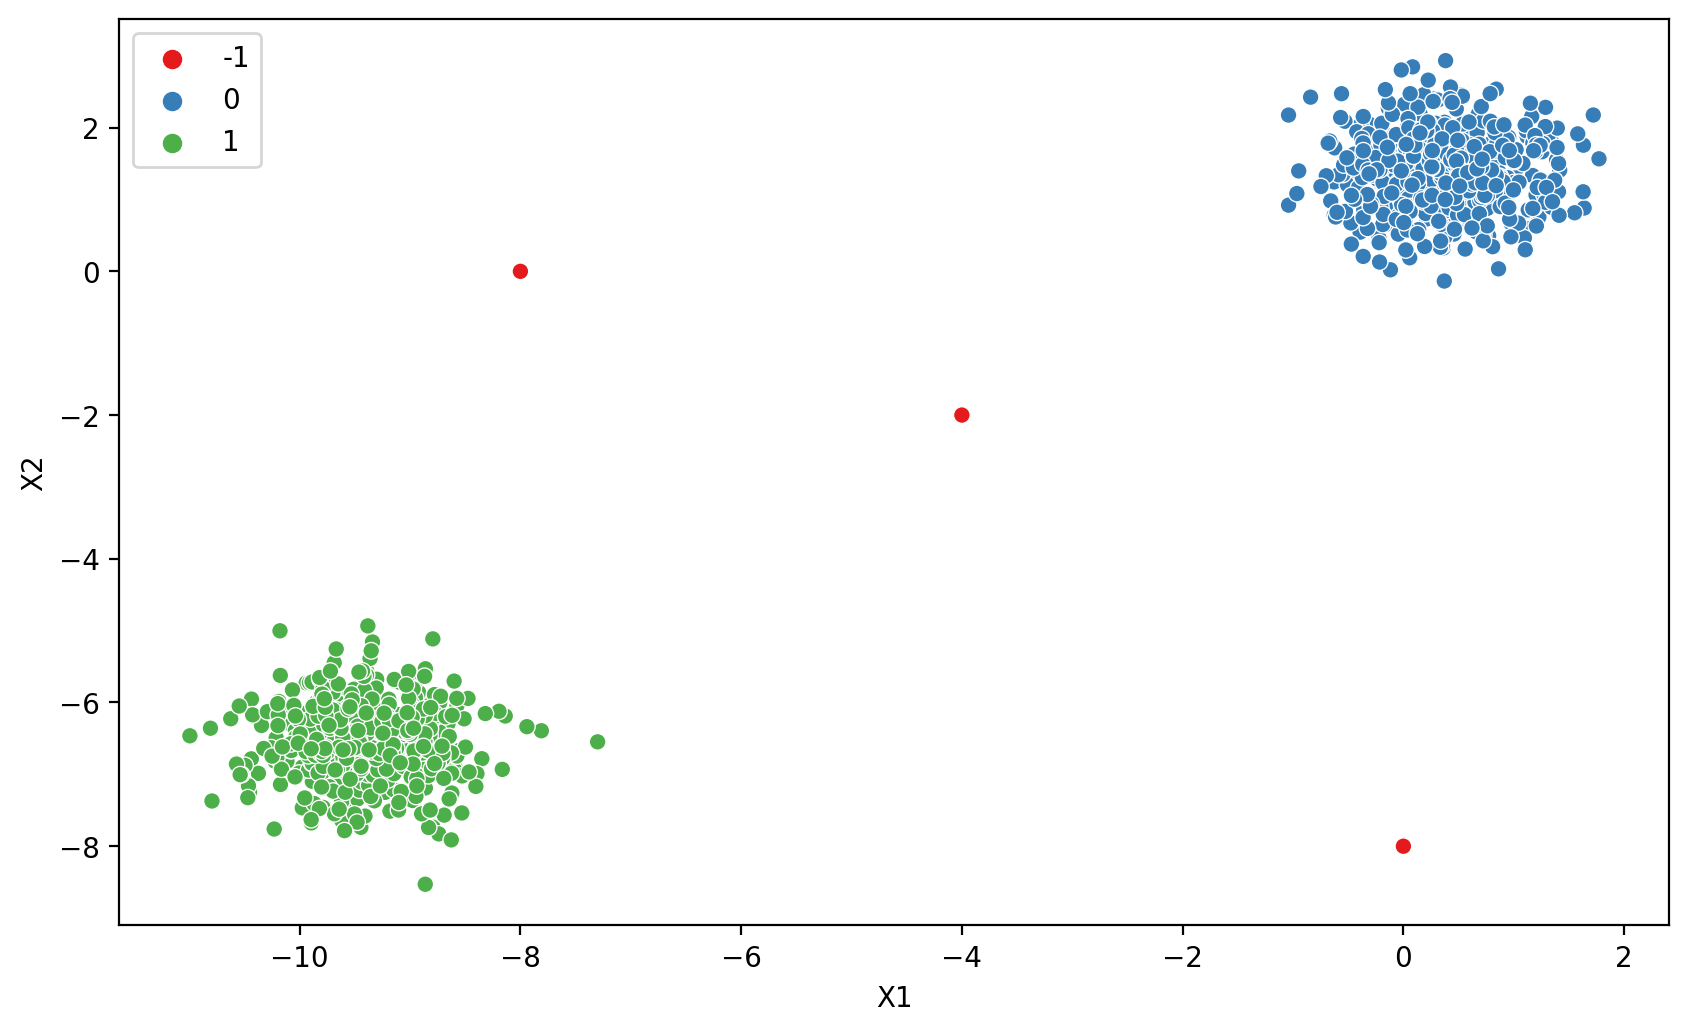

In [21]:
# Как найти хорошее значение эпсилон?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [51]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [52]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [54]:
np.sum(dbscan.labels_ == -1)

3

In [57]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

## Рисуем график для различных значений эпсилон

In [159]:
# Применение метода "локтя" (elbow) / "колена" (knee): 
# https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [170]:
# np.arange(start=0.01,stop=10,step=0.01)

In [189]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Создаём модель
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Сохраняем количество точек выбросов
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Сохраняем процент точек-выбросов (количество выбросов как процент от общего количества точек)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

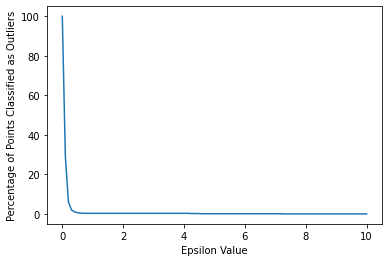

In [190]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

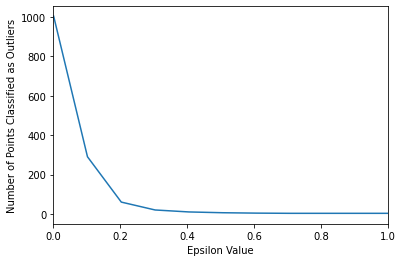

In [192]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Если мы работаем с процентами выбросов

В этом случае мы выбираем некоторый "допустимый" процент выбросов, например 1%-5% выбросов.

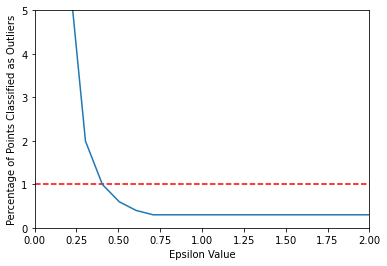

In [193]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

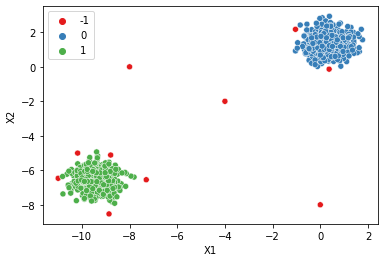

In [194]:
# Как найти хорошее значение эпсилон?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Если мы работаем с количеством выбросов

В этом случае мы можем выбрать некоторое "допустимое" количество точек-выбросов. Например, считаем допустимым 3 выброса.

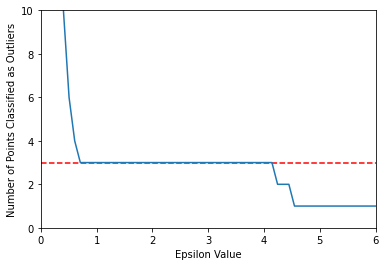

In [203]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

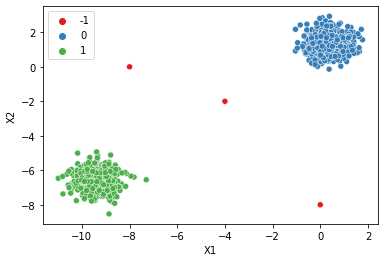

In [204]:
# Какое значение эпсилон хорошее?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Минимальное количество точек (Minimum Samples)

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

Как можно выбрать минимальное значение точек?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [218]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Создаём модеь
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Сохраняем процент точек-выбросов (количество выбросов как процент от общего количества точек)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

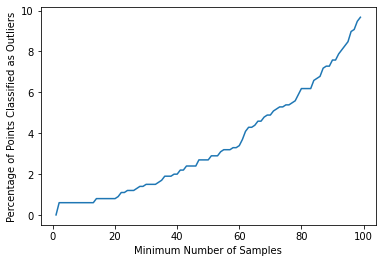

In [226]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

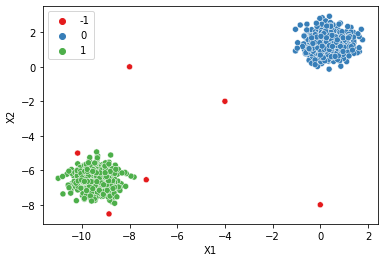

In [229]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

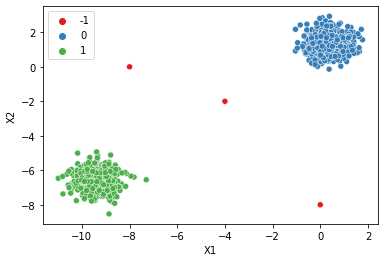

In [230]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

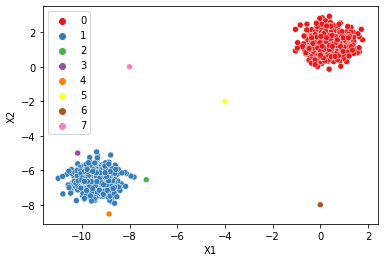

In [231]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

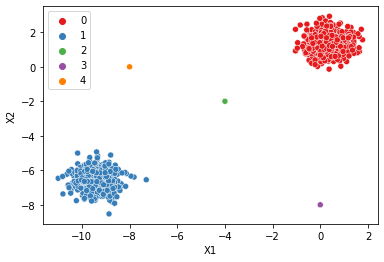

In [232]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

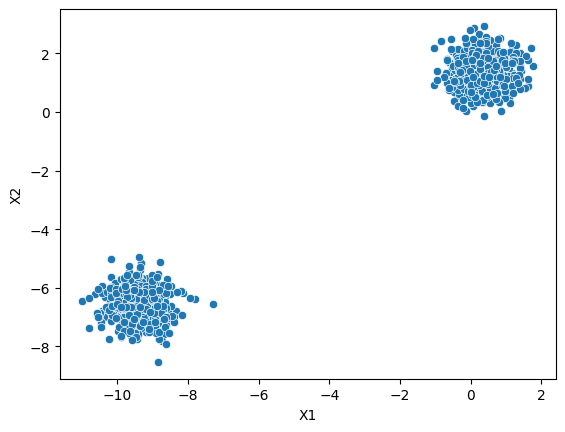

In [4]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

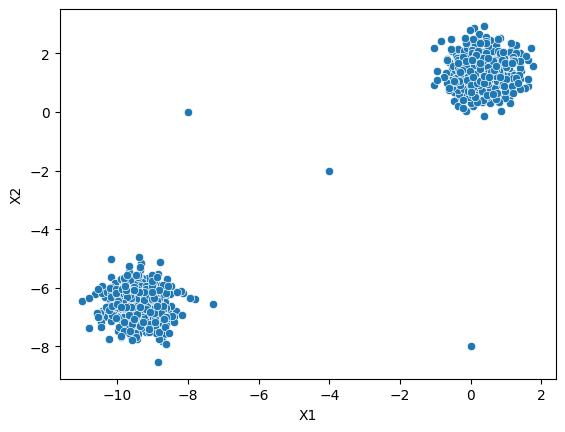

In [5]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [6]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN()

In [9]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

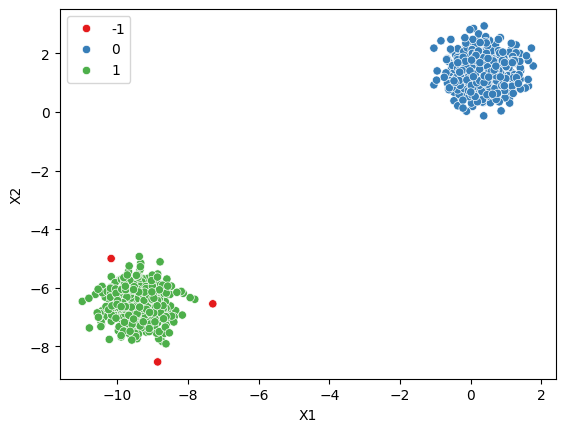

In [10]:
display_categories(dbscan, two_blobs)

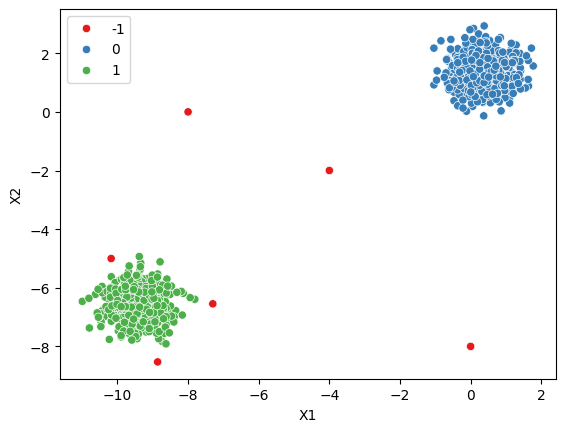

In [11]:
display_categories(dbscan, two_blobs_outliers)

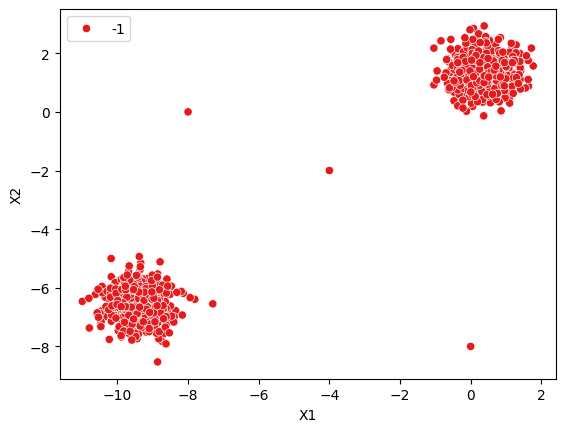

In [12]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

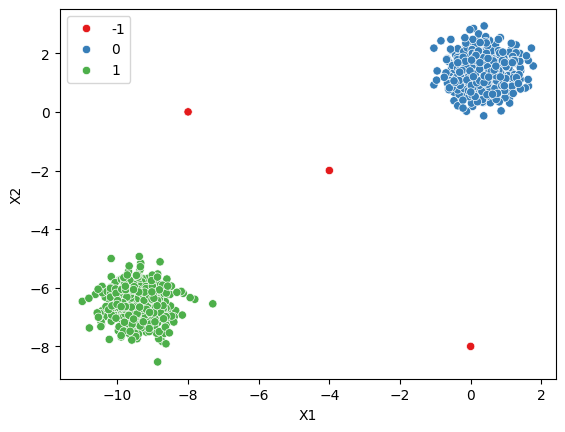

In [15]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [17]:
np.sum(dbscan.labels_ == -1)

3

In [18]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [19]:
len(dbscan.labels_)

1003

In [20]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outliers)

In [21]:
len(np.unique(dbscan.labels_))

1

<Axes: >

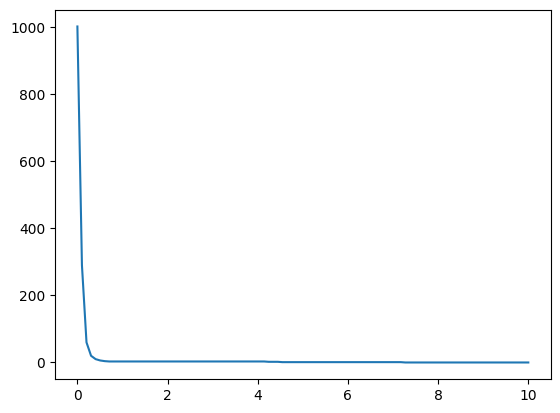

In [22]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)

In [ ]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3)